In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from stockfish import Stockfish
import chess
import chess.engine
import math
import random
from evaluation_pipeline_copy import *
from plot_functions import *

[2. 1. 3. 4.]


In [2]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")

In [20]:
for i in range(len(df)):
    if '#' in df['Evaluation'][i]:
        df['Evaluation'][i] = df['Evaluation'][i][1:]

C:\Users\nunni\AppData\Local\Temp\ipykernel_3912\515674579.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Evaluation'][i] = df['Evaluation'][i][1:]


In [10]:
data = generate_synthetic_data_dict(10,1,df,1)
data

['g7g6',
 'd1f3',
 'd8h4',
 'e1e2',
 'e8d7',
 'f1e2',
 'f8a3',
 'd1g4',
 'h8g8',
 'd1g4']

In [8]:
path=(r"stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")

In [23]:
fen=(r"rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [24]:

def stockfish_evaluation(board, time_limit = 0.01):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score']

In [25]:
def evaluate_move(stockfish,fen,move):
    board = chess.Board(fen)
    board.push_uci(move)
    return stockfish_evaluation(board)

stockfish = Stockfish(path)

In [26]:
score_ensemble = []
        
for i in range(len(data)):
    move = data[i]
    fen = df['FEN'][i]
    if 'w' in fen:
        end = evaluate_move(stockfish, fen, move).white().score()
        if type(end) == type(None):
            score_ensemble.append(0)
        else:
            score_ensemble.append(end - int(df['Evaluation'][i]))
    else:
        end = evaluate_move(stockfish, fen, move).black().score()
        if type(end) == type(None):
            score_ensemble.append(0)
        else:
            score_ensemble.append(end - int(df['Evaluation'][i]))        

print(score_ensemble)

EngineTerminatedError: engine process died unexpectedly (exit code: 3221225477)

In [15]:
# Probability distribution
d = score_ensemble
print(data)

# Plot the KDE using seaborn
distribution_plot(d)

In [16]:
stockfish_score = []
for i in range(len(data)):
    move = data[i]
    fen = df['FEN'][i]
    move_uci_difference, initial_score, moves_df = evaluate_moves(fen, move, "hej")
    stockfish_score.append(max(moves_df['score_difference']))
    
stockfish_score

[-1, 2, 1, 3, -7, 6, -4, 9, 2, 3]

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


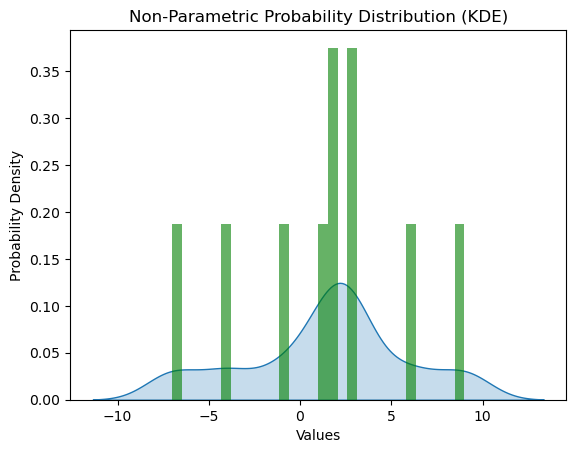

In [17]:
distribution_plot(stockfish_score)